In [1]:
import os
import image_tagger as it

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# # probability of collision with 8 letter filenames and 100 files.
# import string
# 1 - (1 - (1/len(string.ascii_letters))**8)**100
# # 1.865174681370263e-12

In [4]:
project_dir = 'C:\\Users\\oloon\\OneDrive\\Desktop\\projects\\image_tagger'
source_dir = os.path.join(project_dir, 'original_images')
image_dir = os.path.join(project_dir, 'images')
metadata_filename = os.path.join(project_dir, 'images', 'image_metadata.csv')
gallery_filename = os.path.join(project_dir, 'images', 'index.html')

In [5]:
it.scramble_image_directory(source_dir, image_dir)

In [6]:
filepaths = it.find_images(image_dir)
print("number of image files:", len(filepaths))
filepaths[:3]

number of image files: 143


['C:\\Users\\oloon\\OneDrive\\Desktop\\projects\\image_tagger\\images\\ajQwxLFe.jpg',
 'C:\\Users\\oloon\\OneDrive\\Desktop\\projects\\image_tagger\\images\\AJRpSquY.jpg',
 'C:\\Users\\oloon\\OneDrive\\Desktop\\projects\\image_tagger\\images\\aPnUMKob.jpg']

In [7]:
it.tag_images(filepaths, metadata_filename)

....................................................................................................
...........................................

In [8]:
import pandas as pd
metadata_df = pd.read_csv(metadata_filename)
print(metadata_df.shape)
print('n unique original filenames:', len(set(metadata_df['original_filename'])))
print('n unique clean filenames:', len(set(metadata_df['clean_filename'])))

# pd.set_option('display.max_rows', None)
# metadata_df[ metadata_df['clean_filename'].duplicated(keep=False) ].sort_values(['clean_filename'])[['original_filename', 'clean_filename']]

(143, 15)
n unique original filenames: 143
n unique clean filenames: 143


In [9]:
it.autorename(metadata_filename, verbose=1)

In [75]:
it.generate_gallery(metadata_filename, gallery_filename)

Text(0.5, 0, 'Number of Images')

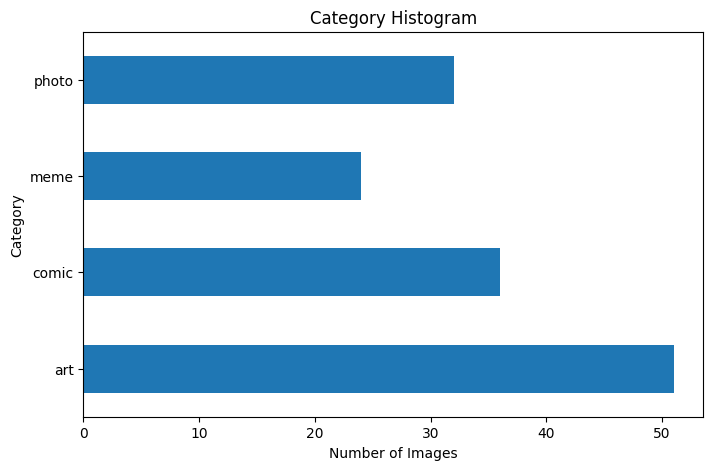

In [62]:
plt.figure(figsize=(8, 5))
metadata_df.groupby('category').size().plot.barh()
plt.title("Category Histogram")
plt.ylabel("Category")
plt.xlabel("Number of Images")

Text(0.5, 0, 'Number of Images')

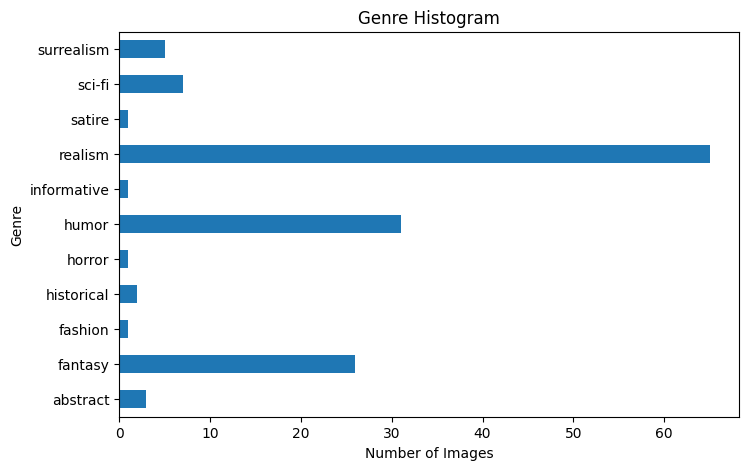

In [63]:
plt.figure(figsize=(8, 5))
metadata_df.groupby('genre').size().plot.barh()
plt.title("Genre Histogram")
plt.ylabel("Genre")
plt.xlabel("Number of Images")

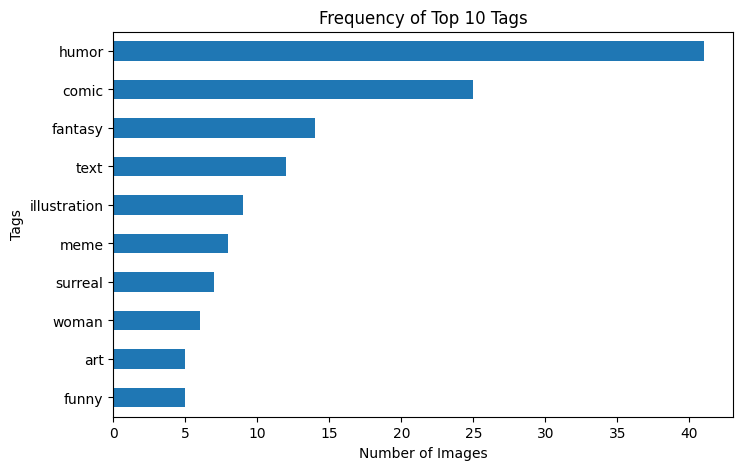

In [67]:
plt.figure(figsize=(8, 5))
tag_counts = metadata_df['tags'].str.split(';').explode('tags').value_counts()
top_tag_counts = tag_counts[:10][::-1]
top_tag_counts.plot.barh()

plt.xlabel('Number of Images')
plt.ylabel('Tags')
plt.title('Frequency of Top 10 Tags')
plt.show()

quartiles [-9.22337204e+09  3.59720300e+00  4.02150100e+00  4.50847250e+00
  7.34342200e+00]


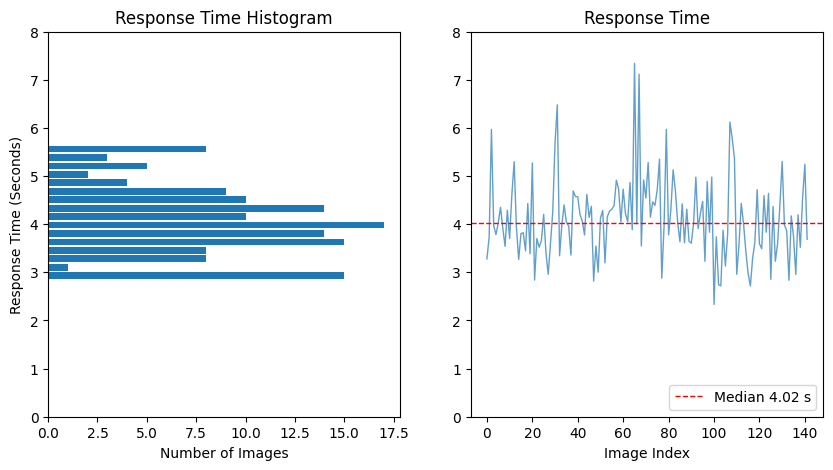

In [73]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
delta_seconds = np.array(pd.to_datetime(metadata_df['timestamp']).diff().astype(np.int64)/1e9)

print('quartiles', np.quantile(delta_seconds, [0, 0.25, 0.5, 0.75, 1]))
bounds = np.quantile(delta_seconds, [0.05, 0.95]) # 90% CI
bounded = np.clip(delta_seconds, bounds[0], bounds[1])

plt.subplot(121)
plt.hist(bounded, bins=16, orientation='horizontal', rwidth=0.8)
plt.ylim(0, 8)
plt.ylabel("Response Time (Seconds)")
plt.xlabel("Number of Images")
plt.title("Response Time Histogram")

plt.subplot(122)
plt.plot(delta_seconds[1:], lw=1, alpha=0.7)
plt.ylim(0, 8)
median = np.median(delta_seconds)
plt.axhline(median, linestyle='dashed', label=f'Median {median:0.2f} s', color='red', lw=1)
plt.legend(loc='lower right')
plt.xlabel("Image Index")
plt.title("Response Time");